In [1]:
# https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv

import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv"

df = pd.read_csv(path,encoding="latin1")
df.head()

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [3]:
df["sentiment"].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64

## Word Counts

In [4]:
df["twitts"][0]

'is bored and wants to watch a movie  any suggestions?'

In [5]:
len(str(df["twitts"][0]).split())

10

In [6]:
df["Word_Counts"] = df["twitts"].apply(lambda words : len(str(words).split()))
df.head()

,twitts,sentiment,Word_Counts
0,is bored and wants to watch a movie any sugge...,0,10
1,back in miami. waiting to unboard ship,0,7
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12
3,ughhh i am so tired blahhhhhhhhh,0,6
4,@mandagoforth me bad! It's funny though. Zacha...,0,26


In [7]:
print("Max Word_Counts : {}".format(df["Word_Counts"].max()))
print("Min Word_Counts : {}".format(df["Word_Counts"].min()))

Max Word_Counts : 32
Min Word_Counts : 1


## Characters Counts

In [8]:
# Boşluk Var !!!

In [9]:
example = "This is"
len(example)

7

In [10]:
def char_counts(words):
    
    s = words.split()
    
    last_words = "".join(s)
    
    return len(last_words)

In [11]:
char_counts(example)

6

In [12]:
df["Characters_Counts"] = df["twitts"].apply(lambda words : char_counts(str(words)))
df.head()

,twitts,sentiment,Word_Counts,Characters_Counts
0,is bored and wants to watch a movie any sugge...,0,10,43
1,back in miami. waiting to unboard ship,0,7,32
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54
3,ughhh i am so tired blahhhhhhhhh,0,6,27
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116


In [13]:
print("Max Characters_Counts : {}".format(df["Characters_Counts"].max()))
print("Min Characters_Counts : {}".format(df["Characters_Counts"].min()))

Max Characters_Counts : 330
Min Characters_Counts : 5


## Average Word Length

In [14]:
x = "this is"  #6 / 2 
y = "thankyou guys" # 12 / 2

len(x),len(y)

(7, 13)

In [15]:
def avg_word_len(words):
    
    s = str(words).split()
    length = len(s)
    
    last_words =  "".join(s)
    counts = len(last_words)
    
    return counts / length

In [16]:
avg_word_len(x),avg_word_len(y)

(3.0, 6.0)

In [17]:
df["Avg_Word_Len"] = df["twitts"].apply(lambda words : avg_word_len(words))
df.head()

,twitts,sentiment,Word_Counts,Characters_Counts,Avg_Word_Len
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000
1,back in miami. waiting to unboard ship,0,7,32,4.571429
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538


## Stop Words Counts

In [18]:
from spacy.lang.en.stop_words import STOP_WORDS as Stopwords

In [19]:
from nltk.corpus import stopwords

In [20]:
# NLTK

len(stopwords.words("english"))

179

In [21]:
# Spacy

len(Stopwords)

326

In [22]:
def stopwords_counts(words):
    
    from spacy.lang.en.stop_words import STOP_WORDS as Stopwords
    
    s = str(words).split()
    
    counts = [word for word in s if word in Stopwords]
    
    return len(counts)

In [23]:
df["StopWords_Counts"] = df["twitts"].apply(lambda words : stopwords_counts(words))
df.head()

,twitts,sentiment,Word_Counts,Characters_Counts,Avg_Word_Len,StopWords_Counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13


## Count ##HashTags and @Mentions

In [24]:
x = "This is #hashtags and this is @Mentions"

In [25]:
"#has".startswith("#")

True

In [26]:
for word in x.split():
    
    if word.startswith("#") or word.startswith("@"):
        print(word)

#hashtags
@Mentions


In [27]:
def hashtags_counts(words):
    
    s = str(words).split()
    
    hashtags_counts = [word for word in s if word.startswith("#")]
    
    return len(hashtags_counts)

def mention_counts(words):
    
    s = str(words).split()
    
    mention_counts = [word for word in s if word.startswith("@")]
    
    return len(mention_counts)

In [28]:
df["Hashtags_Counts"] = df["twitts"].apply(lambda words : hashtags_counts(words))
df["Mentions_Counts"] = df["twitts"].apply(lambda words : mention_counts(words))

df.head()

,twitts,sentiment,Word_Counts,Characters_Counts,Avg_Word_Len,StopWords_Counts,Hashtags_Counts,Mentions_Counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13,0,2


## Numeric Digits are present in twitts

In [29]:
def numeric_counts(words):
    
    s = str(words).split()
    
    numerics = [word for word in s if word.isdigit()]
    
    return len(numerics)

In [30]:
df["Numeric_Counts"] = df["twitts"].apply(lambda words : numeric_counts(words))

df[df["Numeric_Counts"] > 0][["twitts","Numeric_Counts"]].head()

,twitts,Numeric_Counts
16,@BrianQuest I made 1 fo u 2: http://bit.ly/eId...,1
22,Back niggly again today (boo) so couldn't trai...,1
25,Eeeeep! New Moon is only 172 days away... Actu...,1
53,@Gen215 ROFL following Jesus! Found 1 th othr ...,3
62,"@xxbrry yes, you spell it obituary... why?? so...",1


## Upper Case Words Count

In [31]:
x = "I AM HAPPY"
y = "i am happy"
x,y

('I AM HAPPY', 'i am happy')

In [32]:
def upper_counts(words):
    
    s = str(words).split()
    
    upper_counts = [word for word in s if word.isupper()]
    
    return len(upper_counts)

In [33]:
upper_counts(x),upper_counts(y)

(3, 0)

In [34]:
df["Upper_Counts"] = df["twitts"].apply(lambda words : upper_counts(words))

df[["twitts","Upper_Counts"]].head()

,twitts,Upper_Counts
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",1
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


## Preprocessing And Cleaning

## Lower Case Conversion

In [35]:
df["twitts"] = df["twitts"].apply(lambda words : str(words).lower())

df[["twitts"]].head()

,twitts
0,is bored and wants to watch a movie any sugge...
1,back in miami. waiting to unboard ship
2,"@misskpey awwww dnt dis brng bak memoriessss, ..."
3,ughhh i am so tired blahhhhhhhhh
4,@mandagoforth me bad! it's funny though. zacha...


## Contraction to Expansion

In [36]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [37]:
x = " i'm don't he'll "
type(x)

str

In [38]:
def cont_to_exp(words,contractions):
    
    if type(words) is str:
        
        for key in contractions:
            
            value = contractions[key]
            
            words = words.replace(key,value)
            
        return words
    
    else:
        
        return words

In [39]:
cont_to_exp(x,contractions)

' i am do not he will '

In [40]:
x.replace("i'm","i am")

" i am don't he'll "

In [41]:
df["twitts"] = df["twitts"].apply(lambda words : cont_to_exp(words,contractions))

df.head()

,twitts,sentiment,Word_Counts,Characters_Counts,Avg_Word_Len,StopWords_Counts,Hashtags_Counts,Mentions_Counts,Numeric_Counts,Upper_Counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0
2,@misskpey awwww dnt this bring back memoriesss...,0,12,54,4.500000,0,0,1,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0


## Count And Remove Emails

In [42]:
df[df["twitts"].str.contains("@hotmail")]["twitts"].values[0]

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [43]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com '

In [44]:
re.findall(r"([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)",x)

['markbradbury_16@hotmail.com']

In [45]:
def email(words):
    
    mail = re.findall(r"([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)",str(words))
    
    return mail

def remove_email(words):
    
    last_words = re.sub(r"([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)","",str(words))
    
    last_words = " ".join(str(last_words).split())
    
    return last_words

In [46]:
email(x)

['markbradbury_16@hotmail.com']

In [47]:
remove_email(x)

'@securerecs arghh me please'

In [48]:
df["Emails"] = df["twitts"].apply(lambda words : email(words))
df["Emails_Counts"] = df["twitts"].apply(lambda words : len(email(words)))

df[df["Emails_Counts"] > 0][["Emails_Counts","Emails"]]

,Emails_Counts,Emails
3713,1,[markbradbury_16@hotmail.com]


In [49]:
y = '@securerecs arghh me please  markbradbury_16@hotmail.com, rkbradbury_16@hotmail.com'

email(y)

['markbradbury_16@hotmail.com', 'rkbradbury_16@hotmail.com']

In [50]:
remove_email(y)

'@securerecs arghh me please ,'

In [51]:
df["twitts"] = df["twitts"].apply(lambda words : remove_email(words))

df.loc[3713]["twitts"]

'@securerecs arghh me please'

## Counts URLs and Remove It

In [52]:
x = 'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', 
           str(x))

[('https', 'youtube.com', '/kgptalkie')]

In [53]:
def urls_counts(words):
    
    urls_counts = re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', 
           str(words))
    
    return len(urls_counts)

In [54]:
urls_counts(x)

1

In [55]:
df["urls_counts"] = df["twitts"].apply(lambda words : urls_counts(words))

df[df["urls_counts"]> 0][["urls_counts","twitts"]].head()

,urls_counts,twitts
16,1,@brianquest i made 1 fo you 2: http://bit.ly/e...
98,1,heading to work http://twitpic.com/4eojz
99,1,@blondeblogger http://twitpic.com/4w8hk - i am...
144,1,i miss you ã¢ââ« http://blip.fm/~8lc2f
183,1,photo: miss germany http://tumblr.com/xf825f012


In [56]:
len(df[df["urls_counts"]> 0])

185

In [57]:
def remove_urls(words):
    
    last_words = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',
                         "", str(words))
    
    last_words = " ".join(str(last_words).split())
    
    return last_words

In [58]:
remove_urls(x)

'hi, thanks to watching it. for more visit'

In [59]:
df["twitts"] = df["twitts"].apply(lambda words : remove_urls(words))

df[["twitts"]].head()

,twitts
0,is bored and wants to watch a movie any sugges...
1,back in miami. waiting to unboard ship
2,@misskpey awwww dnt this bring back memoriesss...
3,ughhh i am so tired blahhhhhhhhh
4,@mandagoforth me bad! it is funny though. zach...


In [60]:
df.loc[183]["twitts"]

'photo: miss germany'

## Remove RT

In [61]:
x = "rt @username hello hi"

In [62]:
re.sub(r"\brt\b","",x).strip()

'@username hello hi'

In [63]:
def remove_rt(words):
    
    last_words = re.sub(r"\brt\b","",str(words))
    
    last_words = last_words.strip()
    
    return last_words

In [64]:
df["twitts"] = df["twitts"].apply(lambda words : remove_rt(words))

## Special Chars Removal Or Punctuation Removel

In [65]:
x = "test test ...... !!! !!!"

re.sub("[^\w ]","",x).strip()

'test test'

In [66]:
def remove_special(words):
    
    last_words = re.sub(r"[^\w ]","",str(words)).strip()
    
    return last_words

In [67]:
remove_special(x)

'test test'

In [68]:
df["twitts"] = df["twitts"].apply(lambda words : remove_special(words))

In [69]:
df.head()

,twitts,sentiment,Word_Counts,Characters_Counts,Avg_Word_Len,StopWords_Counts,Hashtags_Counts,Mentions_Counts,Numeric_Counts,Upper_Counts,Emails,Emails_Counts,urls_counts
0,is bored and wants to watch a movie any sugges...,0,10,43,4.300000,5,0,0,0,0,[],0,0
1,back in miami waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,[],0,0
2,misskpey awwww dnt this bring back memoriessss...,0,12,54,4.500000,0,0,1,0,1,[],0,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,[],0,0
4,mandagoforth me bad it is funny though zachary...,0,26,116,4.461538,13,0,2,0,0,[],0,0


## Remove Multiple Spaces 

In [70]:
x = "hi  hello  how are you"

In [71]:
" ".join(str(x).split())

'hi hello how are you'

In [72]:
def remove_multiplespaces(words):
    
    last_words = " ".join(str(words).split())
    
    return last_words

In [73]:
remove_multiplespaces(x)

'hi hello how are you'

In [74]:
df["twitts"] = df["twitts"].apply(lambda words : remove_multiplespaces(words))

## Remove HTML Tags

In [75]:
from bs4 import BeautifulSoup

In [76]:
x = '<html><h1> thanks for watching it </h1></html>'

In [77]:
re.sub("<html><h1>","",x),re.sub("<h1><html>","",x)

(' thanks for watching it </h1></html>',
 '<html><h1> thanks for watching it </h1></html>')

In [78]:
BeautifulSoup(x, "lxml").get_text().strip()

'thanks for watching it'

In [79]:
def remove_html(words):
    
    last_words = BeautifulSoup(str(words), "lxml").get_text().strip()
    
    return last_words

In [80]:
remove_html(x)

'thanks for watching it'

In [81]:
df["twitts"] = df["twitts"].apply(lambda words : remove_html(words))

## Remove StopWords

In [82]:
from spacy.lang.en.stop_words import STOP_WORDS as Stopwords

In [83]:
def remove_stopwords(words):
    
    s = str(words).split()
    
    last_words_list = [word for word in s if word not in Stopwords]
    
    last_words = " ".join(last_words_list)
    
    return last_words

In [84]:
df["twitts"].head()

0    is bored and wants to watch a movie any sugges...
1                back in miami waiting to unboard ship
2    misskpey awwww dnt this bring back memoriessss...
3                     ughhh i am so tired blahhhhhhhhh
4    mandagoforth me bad it is funny though zachary...
Name: twitts, dtype: object

In [85]:
df["twitts"] = df["twitts"].apply(lambda words : remove_stopwords(words))

df["twitts"].head()

0                  bored wants watch movie suggestions
1                           miami waiting unboard ship
2    misskpey awwww dnt bring memoriessss thnk sad lol
3                             ughhh tired blahhhhhhhhh
4    mandagoforth bad funny zachary quinto amp repl...
Name: twitts, dtype: object

## Remove Accented Chars

In [86]:
x = 'Áccěntěd těxt'

In [87]:
import unicodedata

In [88]:
def remove_accented_chars(words):
    
    words = unicodedata.normalize("NFKD",words).encode("ascii","ignore").decode("utf-8")
    
    return words

In [89]:
remove_accented_chars(x)

'Accented text'

In [90]:
df["twitts"] = df["twitts"].apply(lambda words : remove_accented_chars(words))

df["twitts"].head()

0                  bored wants watch movie suggestions
1                           miami waiting unboard ship
2    misskpey awwww dnt bring memoriessss thnk sad lol
3                             ughhh tired blahhhhhhhhh
4    mandagoforth bad funny zachary quinto amp repl...
Name: twitts, dtype: object

## Convert Into Base or Root Form of Word

In [91]:
import spacy

nlp = spacy.load("en_core_web_sm")

x = "chocolates balls times"

y = "this is chocolates. what is times? this balls"

In [92]:
doc = nlp(y)

for token in doc:
    
    print(f"Text : {token.text:{15}}, Lemma : {token.lemma_}")

Text : this           , Lemma : this
Text : is             , Lemma : be
Text : chocolates     , Lemma : chocolate
Text : .              , Lemma : .
Text : what           , Lemma : what
Text : is             , Lemma : be
Text : times          , Lemma : time
Text : ?              , Lemma : ?
Text : this           , Lemma : this
Text : balls          , Lemma : ball


In [93]:
def make_to_base(words):
    
    import spacy
    
    nlp = spacy.load("en_core_web_sm")
    
    words_list = []
    
    doc = nlp(str(words))
    
    for token in doc:
        
        lemma = token.lemma_
        
        if lemma == "-PRON-" or lemma == "be" :
            
            lemma = token.text
        
        words_list.append(lemma)
        
    return " ".join(words_list)

In [94]:
y,make_to_base(y)

('this is chocolates. what is times? this balls',
 'this is chocolate . what is time ? this ball')

In [95]:
df["twitts"] = df["twitts"].apply(lambda words : make_to_base(words))

df["twitts"].head()

0                    bored want watch movie suggestion
1                              miami wait unboard ship
2    misskpey awwww dnt bring memoriessss thnk sad lol
3                             ughhh tired blahhhhhhhhh
4    mandagoforth bad funny zachary quinto amp repl...
Name: twitts, dtype: object

## Commen words removal

In [96]:
x = "this is this okay bye"

In [97]:
def commen_words(dataframe):
    
    counts = pd.Series(" ".join(dataframe).split()).value_counts().reset_index()

    counts.columns = ["Name","Counts"]

    counts = counts.sort_values(by = "Counts", ascending = False)

    plt.figure(figsize = (15,6))
    sns.barplot(y = "Name",x = "Counts", data = counts.head(15))

    size = 15
    plt.xlabel("Counts", fontsize = size)
    plt.ylabel("Name", fontsize = size)
    plt.title("Counts Graphs", fontsize = size)
    plt.show()
    
    return counts

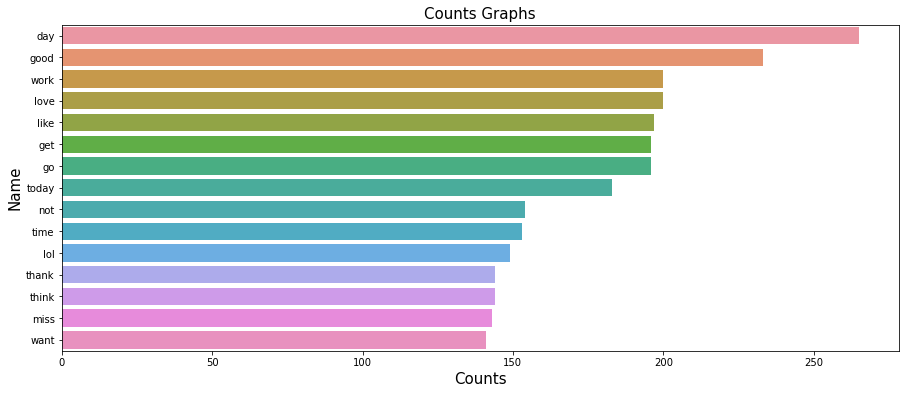

In [98]:
data_counts = commen_words(dataframe=df["twitts"])

In [99]:
data_counts.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Name,day,good,work,love,like,get,go,today,not,time,lol,thank,think,miss,want,know,m,I,amp,look
Counts,265,233,200,200,197,196,196,183,154,153,149,144,144,143,141,140,136,135,125,118


In [100]:
freq20 = data_counts["Name"][:20].tolist()
len(freq20)

20

In [101]:
def remove_common(words,common_list):
    
    last_words = [word for word in str(words).split() if word not in common_list]
    
    last_words = " ".join(last_words)
    
    return last_words

In [102]:
df["twitts"][3]

'ughhh tired blahhhhhhhhh'

In [104]:
data_counts.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Name,day,good,work,love,like,get,go,today,not,time,lol,thank,think,miss,want,know,m,I,amp,look
Counts,265,233,200,200,197,196,196,183,154,153,149,144,144,143,141,140,136,135,125,118


In [105]:
df["twitts"] = df["twitts"].apply(lambda words : remove_common(words, freq20))

df["twitts"].head()

0                         bored watch movie suggestion
1                              miami wait unboard ship
2        misskpey awwww dnt bring memoriessss thnk sad
3                             ughhh tired blahhhhhhhhh
4    mandagoforth bad funny zachary quinto reply sy...
Name: twitts, dtype: object

## Rare Words Removel

In [106]:
rare_words = data_counts[data_counts["Counts"] == 1]["Name"].tolist()
rare_words

['108',
 'ogz',
 'hotquot',
 'delias',
 'dow',
 'itiswhatitisent',
 'cornflake',
 'cracker',
 'skiing',
 'katbow',
 'chillingggg',
 'thati',
 'doppe',
 'sweepstake',
 'gi',
 'fridge',
 'nomysteryleft',
 'onelet',
 'beschbach',
 'shropshirepixie',
 'dancer',
 'donofrio',
 'beddie',
 'leed',
 'madam',
 'markhricher',
 'live_for_film',
 'motivate',
 'intl',
 'nnoooo',
 'littlefletcher',
 'ligament',
 'napping',
 'ohwow',
 'overness',
 'blink',
 'nonnie21751',
 'voucher',
 'nancy',
 'rjtoronto',
 '6day',
 'todaystorm',
 'elbow',
 'sickshe',
 'obdh',
 'quothot',
 'gill',
 'bluvox',
 'popy89',
 'officiaalnaach',
 'briannaglenn',
 'gow2',
 'physic',
 'arse',
 'convenient',
 'jodywatley',
 'restructure',
 'texasheartland',
 'nay',
 'luvie',
 'mosquito',
 'boooooooooo',
 'travelling_wolf',
 'reservation',
 'tydi',
 'renmiu',
 'wknd',
 'ampjessica',
 'kewiki',
 'orderly',
 'fart',
 'zoe',
 'parentss',
 'hoodenershorse',
 'therealtommyg',
 'trace',
 'shootno',
 'quotyou',
 'foto',
 'grain',
 'atl

In [107]:
def remove_rarewords(words,rare_list):
    
    last_words = [word for word in str(words).split() if word not in rare_list]
    
    last_words = " ".join(last_words)
    
    return last_words

In [108]:
df["twitts"] = df["twitts"].apply(lambda words : remove_rarewords(words, rare_words))

df["twitts"].head()

0    bored watch movie suggestion
1                      miami wait
2             awwww dnt bring sad
3                     ughhh tired
4                 bad funny reply
Name: twitts, dtype: object

## Word Cloud Visualization

In [109]:
from wordcloud import WordCloud

In [110]:
text = " ".join(df["twitts"])

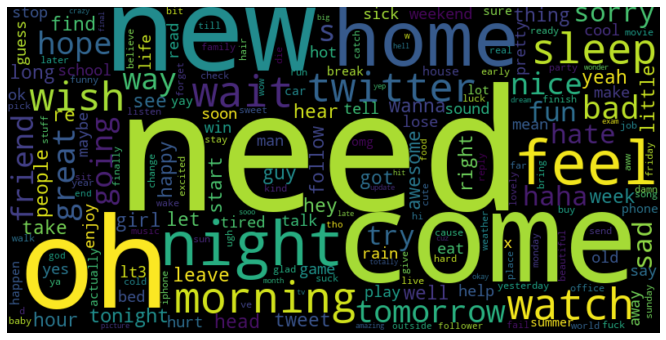

In [111]:
plt.figure(figsize = (15,6))

wc = WordCloud(width=800,
               height=400,).generate(text)

plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

## Spelling Correction

In [112]:
from textblob import TextBlob

In [113]:
x = "thankkks forrr watchhiing it"

" ".join(TextBlob(x).correct().split())

'thanks for watching it'

## Tokenization With TextBlob

In [114]:
x = "thanks#watching this video. please like it"
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [115]:
nlp = spacy.load("en_core_web_sm")

for token in nlp(x):
    print(f"Text : {token.text}")

Text : thanks#watching
Text : this
Text : video
Text : .
Text : please
Text : like
Text : it


## Detecting Nouns

In [116]:
x = "Breaking News : Donal Trump, The president of the USA is looking to sign a deal to mine the moon"

In [117]:
for noun in nlp(x).noun_chunks:
    
    print(f"Noun : {noun}")

Noun : Donal Trump
Noun : The president
Noun : the USA
Noun : a deal
Noun : the moon


## Language Translation and Detection

In [118]:
from textblob import TextBlob

tb = TextBlob(x)

#tb.detect_language()

#tb.translate(to = "fr")

## Use TextBlob's InBuilt Sentiment Classifier

In [119]:
x = "we all stands together. we are gonna win this fight"

In [122]:
from textblob.sentiments import NaiveBayesAnalyzer,BaseSentimentAnalyzer


In [123]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)